
# Step 1: Load the Dataset
We begin by uploading and loading the "Covid-19" dataset using pandas. This dataset contains the following columns Date,Country,Confirmed,Recovered,Deaths.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving covid_data.csv to covid_data.csv


##Step 2: Import the necessary Libraries
we begin by importing the libraruies required for exploratory data analysis like pandas,matplotlib and seaborn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('covid_data.csv')


##Step 3: Understanding the dataset
Let's understand the structure and content of the dataset using info(),head() and describe().This helps us check data types,missing values,and statistical summaries.


In [4]:
print(df.head())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
print(df.describe())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

##Step 4: clean the data
Clean the data and check for null values and duplicates using isnull() and duplicated() and remove duplicates and null values from the dataset to make it more suitable for analysis

In [7]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [8]:
print(df.duplicated().sum())


0


In [9]:
# Remove duplicates
df = df.drop_duplicates()

# Fill or drop missing values
df = df.dropna()  # Or use df.fillna(0) if appropriate


##Step 5: Basic EDA
Perform basic Exploratory data analysis by
Showing top 5 rows,
Summary statistics,
Number of countries in the data and
Most affected countries

In [20]:
# Number of countries in India
print("Number of unique countries:", df['Country/Region'].nunique())


Number of unique countries: 187


In [23]:
# Top countries in the data
top_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_countries)


Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Confirmed, dtype: int64


In [24]:
# Summary statistics
print("--- Summary Statistics ---")
print(df.describe())
print("\n" + "="*50 + "\n")

--- Summary Statistics ---
          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.

In [25]:
# Most affected countries (Top 5 by Confirmed Cases)

most_affected_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5)
print("--- Top 5 Most Affected Countries (Confirmed Cases) ---")
print(most_affected_countries)

--- Top 5 Most Affected Countries (Confirmed Cases) ---
Country/Region
US              4290259
Brazil          2442375
India           1480073
Russia           816680
South Africa     452529
Name: Confirmed, dtype: int64


In [26]:
#  Show top 5 rows
print("--- Top 5 Rows ---")
print(df.head())
print("\n" + "="*50 + "\n")

--- Top 5 Rows ---
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526    

##Step 6: Visualize the data in a dataset
We will visualize the dataset using Line chart, Bar chart and pie chart for confirmed cases,showing top countries with highest deaths and pie chart for showing gobal recovered versus deaths


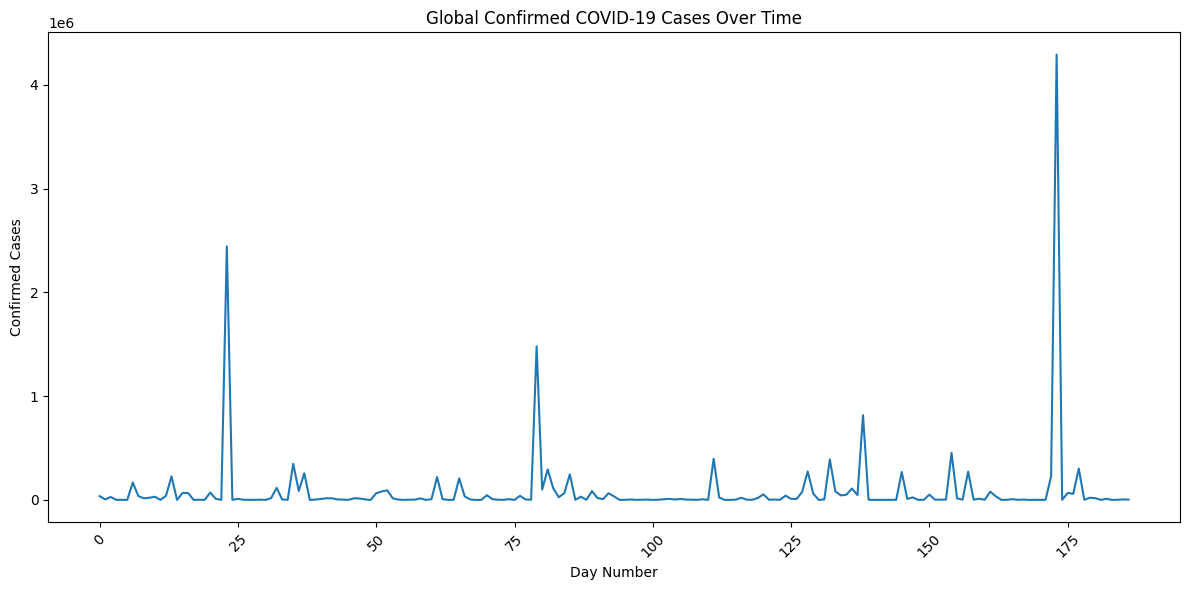

In [27]:
# Line chart - Confirmed cases over time
import matplotlib.pyplot as plt
import pandas as pd

# Sum confirmed cases per day (without using Date for x-axis)
global_daily = df.groupby(df.index)['Confirmed'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_daily.index, global_daily['Confirmed'])
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Day Number')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



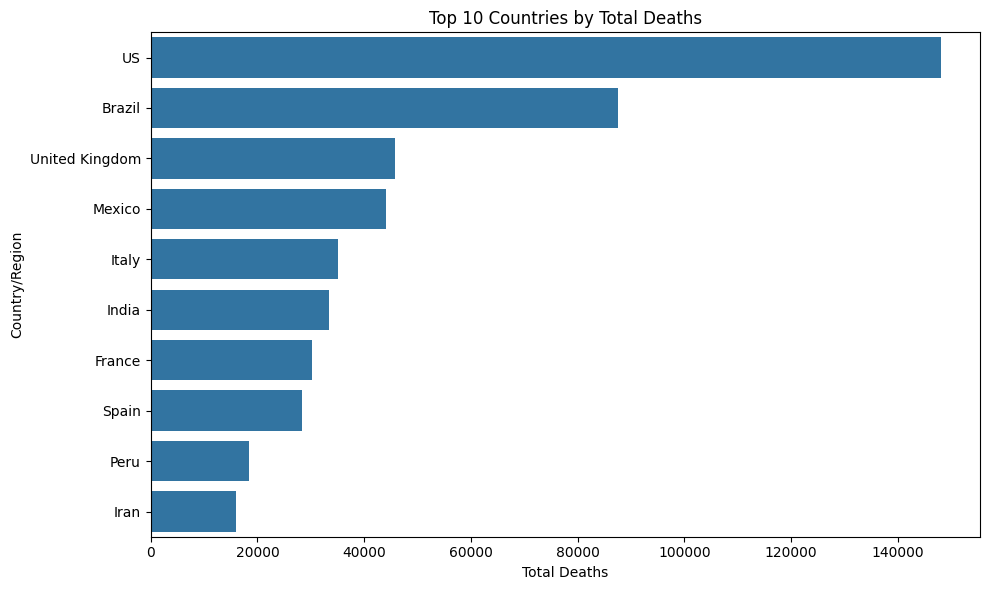

In [28]:
# Bar chart - Top 10 countries with highest deaths
top_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_deaths.values, y=top_deaths.index)
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()


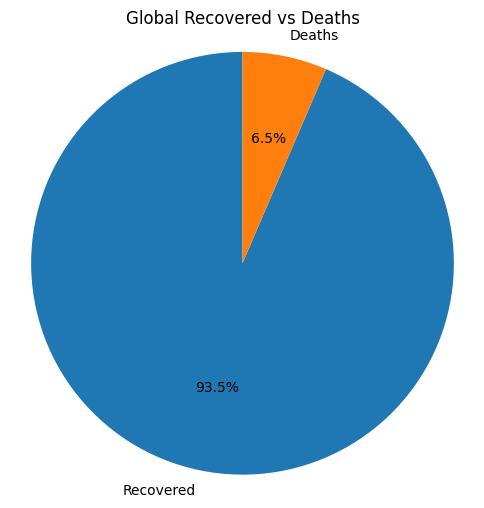

In [29]:
# Pie chart of Global recovered vs Deaths
total_recovered = df['Recovered'].sum()
total_deaths = df['Deaths'].sum()

labels = ['Recovered', 'Deaths']
sizes = [total_recovered, total_deaths]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Global Recovered vs Deaths')
plt.axis('equal')
plt.show()


##OBSERVATIONS
## Global Confirmed Cases
- Confirmed cases show a steady rising trend globally over time.
- Surges in the curve may correspond to different waves of the pandemic.
- Countries with higher populations or lower restrictions show sharper increases.

## Global Recovered Cases
- Recovered cases are rising steadily, often outpacing deaths.
- Indicates that treatment and management of COVID-19 are improving.
- Recovery trends provide hope despite ongoing case surges.

## Global Deaths
- Deaths increase at a slower rate than confirmed cases and recoveries.
- Peaks in deaths usually follow spikes in confirmed cases with a lag.
- Mortality trends highlight the impact of healthcare responses and vaccination.

## Country-wise Comparison (Top Affected)
- The USA,Brazil and India consistently report high case numbers.
- Some countries show faster recovery trends relative to confirmed cases.
- Country comparisons emphasize the uneven global impact of COVID-19.

## Overall Insights
- The pandemic shows a global upward trend in cases but also increasing recoveries.
- Continuous monitoring, vaccinations, and public health measures remain crucial.
- Data highlights progress in managing the virus, yet vigilance is still needed.
